# Customer Retention Rate Nedir ?

Yeni müşteri kazanmak, eldeki müşterleri tutmaktan daha fazla kaynak tüketir. Müşterileri elde tutmak kritik bir öneme sahiptir. Şirketler bu yüzden müşteri elde tutma oranını takip ederler. Dönem dönem gerekli gördüklerinde bu oranları iyileştirmek için kararlar alırlar. Burada her türden etkileşim bir baz olabilir. Örnekte satın almayı kullanacağız. Belirli bir yılı seçip aylar arasında karşılaştırma yapacağız.

# Çalışma Dosyası ve Kütüphaneler

In [350]:
#Kütüphaneler
import pandas as pd
import seaborn as sns
import warnings
import datetime as dt
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") 

# Dosya ve gerekli kolonlar
data = pd.read_csv("https://raw.githubusercontent.com/streamlit/example-app-cohort-analysis/main/datasets/relay-foods.csv")[["UserId","OrderDate","TotalCharges"]]

# Genel Bakış

In [351]:
data.drop_duplicates(inplace=True)
data

,UserId,OrderDate,TotalCharges
0,47,11/1/2009,$ 50.67
1,47,20/1/2009,$ 26.60
2,47,3/2/2009,$ 38.71
3,47,6/2/2009,$ 53.38
4,47,6/2/2009,$ 14.28
...,...,...,...
2886,393616,8/3/2010,$ 60.02
2887,394290,7/3/2010,$ 45.43
2888,394346,7/3/2010,$ 14.21
2889,395039,8/3/2010,$ 34.62


Boş kontrolü

In [352]:
data.isna().sum()

UserId          0
OrderDate       0
TotalCharges    0
dtype: int64

TotalCharges Düzenlemesi

In [353]:
data["TotalCharges"] = data["TotalCharges"].str[2:].astype("float")

Müşteri Sayıları

In [354]:
data["UserId"].nunique() 

757

Her müşterinin toplam etkileşimi

In [355]:
data['UserId'].value_counts().head()

47      76
253     76
4622    75
207     45
277     31
Name: UserId, dtype: int64

Her müşterinin toplam getirisi

In [356]:
data.groupby("UserId").sum(["TotalCharges"]).sort_values(["TotalCharges"],ascending=False)

,TotalCharges
UserId,
253,6981.14
4622,5361.49
277,5086.47
45949,3624.73
136879,3615.68
...,...
131159,2.09
115791,2.05
130836,1.79


# Tarih kolonu

Tarih kolonunun düzeltimesi

In [357]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'],dayfirst=True)

In [358]:
data

,UserId,OrderDate,TotalCharges
0,47,2009-01-11,50.67
1,47,2009-01-20,26.60
2,47,2009-02-03,38.71
3,47,2009-02-06,53.38
4,47,2009-02-06,14.28
...,...,...,...
2886,393616,2010-03-08,60.02
2887,394290,2010-03-07,45.43
2888,394346,2010-03-07,14.21
2889,395039,2010-03-08,34.62


Farklı yıllar olduğu için yıl değerini bir kolona koyuyorum böylece istediğimiz yılı daha rahat alacağız.

In [359]:
data["year"] = data['OrderDate'].dt.year

# Zaman İşlemleri

Burada her etkileşiminde o etkileşim olan ayı ve yılı alıyoruz. Günü ise 1 yapıyoruz. Böylece direkt ayı aldık gibi düşünebilir.

In [360]:
def get_month(x): return dt.datetime(x.year, x.month,1)
data['OrderMonth'] = data['OrderDate'].apply(get_month)

Müşteriyi gördüğümüz ilk an

In [361]:
data['CohortMonth'] =  data.groupby('UserId')['OrderMonth'].transform('min')

In [362]:
# duruma bakış
data[data["UserId"] == 47]

,UserId,OrderDate,TotalCharges,year,OrderMonth,CohortMonth
0,47,2009-01-11,50.67,2009,2009-01-01,2009-01-01
1,47,2009-01-20,26.60,2009,2009-01-01,2009-01-01
2,47,2009-02-03,38.71,2009,2009-02-01,2009-01-01
3,47,2009-02-06,53.38,2009,2009-02-01,2009-01-01
4,47,2009-02-06,14.28,2009,2009-02-01,2009-01-01
...,...,...,...,...,...,...
71,47,2010-02-23,27.97,2010,2010-02-01,2009-01-01
72,47,2010-02-25,15.50,2010,2010-02-01,2009-01-01
73,47,2010-03-01,48.15,2010,2010-03-01,2009-01-01
74,47,2010-03-02,34.13,2010,2010-03-01,2009-01-01


Sipariş ve ilk etkileşim tarihlerinden gün,ay ve yılı alıyoruz.

In [363]:
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

day, order_month, order_year =  get_date_elements(data,'OrderMonth')
day, cohort_month, cohort_year =  get_date_elements(data,'CohortMonth')

O tarihteki etkileşimden ilk etkileşimdeki tarih değerlerini çıkarıyoruz. Sonrasında +1 eklenmesi 0 görünmemesi için.

In [364]:
year_diff = order_year - cohort_year
month_diff = order_month - cohort_month
data['CohortIndex'] = year_diff * 12 + month_diff + 1

In [365]:
data.head()

,UserId,OrderDate,TotalCharges,year,OrderMonth,CohortMonth,CohortIndex
0,47,2009-01-11,50.67,2009,2009-01-01,2009-01-01,1
1,47,2009-01-20,26.60,2009,2009-01-01,2009-01-01,1
2,47,2009-02-03,38.71,2009,2009-02-01,2009-01-01,2
3,47,2009-02-06,53.38,2009,2009-02-01,2009-01-01,2
4,47,2009-02-06,14.28,2009,2009-02-01,2009-01-01,2


# Tablo oluşturma ve Görselleştirme

Örnek için bakarken 2009 yılını alıyoruz.

In [366]:
data = data[data["year"] == 2009]

grouping = data.groupby(['CohortMonth', 'CohortIndex']) #önce aya sonra sonra index değerine göre gruplama
cohort_data = grouping['UserId'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth', columns ='CohortIndex', values = 'UserId') #pivot
cohort_counts.index = cohort_counts.index.strftime('%B %Y') #zaman kısmını ay ve yıl olarak düzgün göstermek için

In [367]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
January 2009,22.0,8.0,10.0,9.0,10.0,8.0,8.0,7.0,7.0,7.0,7.0,8.0
February 2009,15.0,3.0,5.0,1.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0,NaN
March 2009,13.0,4.0,5.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,NaN,NaN
April 2009,39.0,13.0,10.0,13.0,6.0,7.0,4.0,6.0,2.0,NaN,NaN,NaN
May 2009,50.0,13.0,12.0,5.0,4.0,6.0,3.0,5.0,NaN,NaN,NaN,NaN
June 2009,32.0,15.0,9.0,6.0,7.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN
July 2009,50.0,23.0,13.0,10.0,11.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
August 2009,31.0,11.0,9.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2009,37.0,15.0,14.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Görselleştirme

### Direkt sayısal değerler için

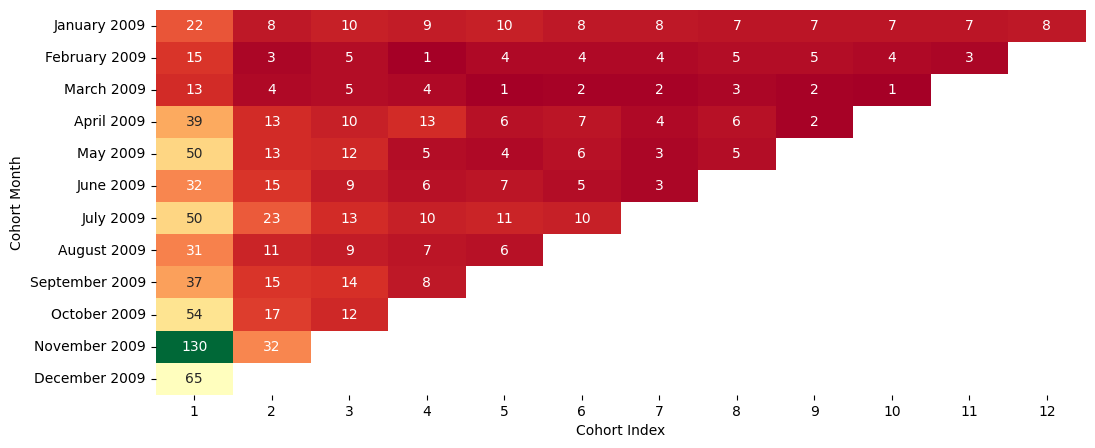

In [368]:
plt.figure(figsize=(12,5))
sns.heatmap(cohort_counts, annot=True, cmap='RdYlGn', cbar=False, fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.show()

**Görüldüğü gibi ocak ayında 22 kişi gelmiş. Sonrasında bu gelen 22 kişinin diğer aylarda tekrar ziyaretleri görülüyor.**

(22 : 8-10-9-10-8-8-7-7-7-7-8)

### Yüzdelik çevirme ile

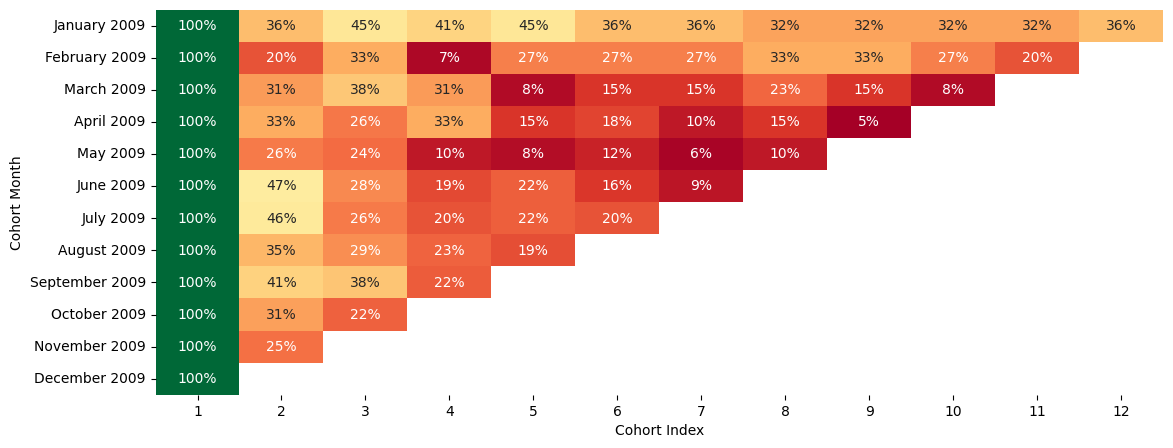

In [369]:
cohort_counts_percent = cohort_counts.divide(cohort_counts.iloc[:,0], axis=0)
plt.figure(figsize=(13,5))
sns.heatmap(cohort_counts_percent, annot=True, cmap='RdYlGn', fmt='.0%', cbar=False)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.show()

### Harcamalar bazında

Sadece tekrar gelmeleri yeterli değil aynı zamanda gelenlerin ne kadar harcadıkları da önemli bir değerlendirme kriteridir

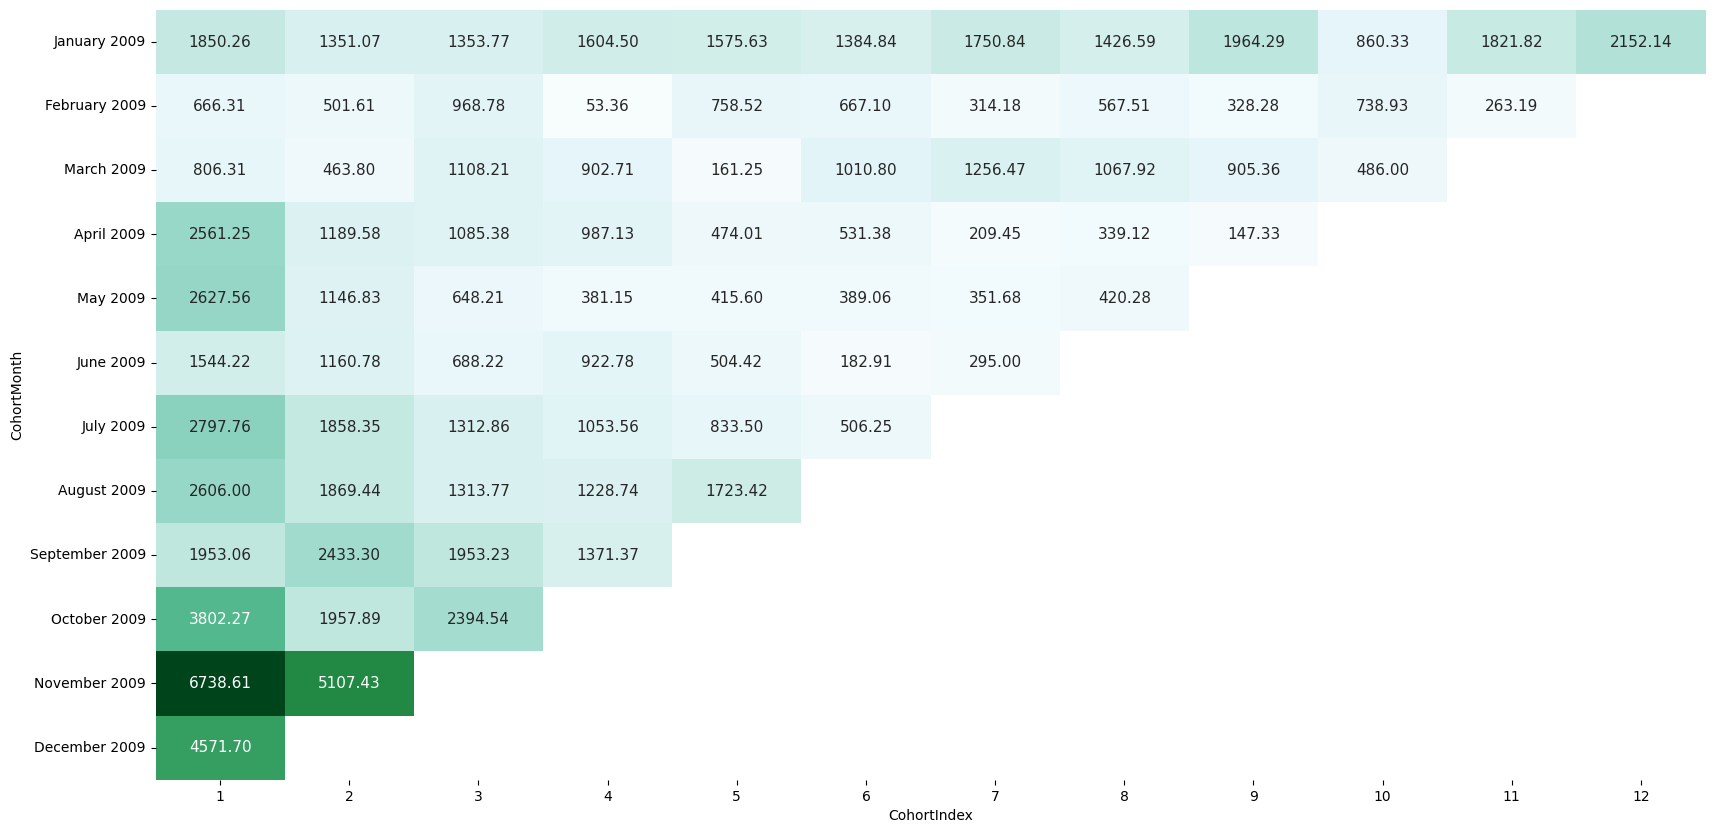

In [370]:
revenue_cohort_df = data.groupby(['CohortMonth', 'CohortIndex'])['TotalCharges'].apply(pd.Series.sum).round(2).reset_index()
revenue_cohort_df = revenue_cohort_df.pivot(index='CohortMonth', columns=['CohortIndex'], values='TotalCharges')
revenue_cohort_df.index = revenue_cohort_df.index.strftime('%B %Y')

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(revenue_cohort_df, annot=True, annot_kws={"size":11}, cmap='BuGn', fmt='.2f', cbar=False)
plt.show()